In [346]:
import nlp_utils
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageDraw, ImageFont
from nlp_utils import add_text_to_image
import os

In [45]:
data_path = '/home/dcor/roeyron/datasets/CUB_200_2011'
print(os.listdir(data_path + '/CUB_200_2011'))

print('\n' + 400 * '^' + '\n')
print('README:')
with open(data_path + '/CUB_200_2011/README', 'r') as f:
    print(f.read())

print('\n' + 400 * '^' + '\n')
print('images.txt:')
with open(data_path + '/CUB_200_2011/images.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x[:5])

print('\n' + 400 * '^' + '\n')
print('classes.txt:')
with open(data_path + '/CUB_200_2011/classes.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x)

print('\n' + 400 * '^' + '\n')
print('attributes.txt:')
with open(data_path + '/attributes.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x[:10])


print('\n' + 400 * '^' + '\n')
print('image_class_labels.txt:')
with open(data_path + '/CUB_200_2011/image_class_labels.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x[:10])

print('\n' + 400 * '^' + '\n')
print('certanties.txt:')
with open(data_path + '/CUB_200_2011/attributes/certainties.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x[:10])

print('\n' + 400 * '^' + '\n')
print('image_attribute_labels.txt:')
with open(data_path + '/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
    x = f.readlines()
print(len(x))
print(x[:10])

['images', 'attributes', 'parts', 'images.txt', 'train_test_split.txt', 'classes.txt', 'image_class_labels.txt', 'bounding_boxes.txt', 'README']

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

README:
The Caltech-UCSD Birds-200-2011 Dataset

For more information about the dataset, visit the project website:

  http://www.vision.caltech.edu/visipedia

If you use the dataset in a publication, please cite the dataset in
the style described on the dataset website (see url above).

Directory Information
---------------------

- images/
    The images organized in subdirectories based on species. See 
    IMAGES AND CLASS LABELS section below 

In [240]:
def get_image_attribute_labels(data_path):
    path_image_attribute_labels = os.path.join(data_path, 'CUB_200_2011/attributes/image_attribute_labels.txt')
    with open(path_image_attribute_labels, 'r') as f:
        lines = f.read().split('\n')
    len(lines)
    rows = []
    for line in lines:
        line = line.strip()
        parts = line.split(' ')
        if len(parts) != 5:
            continue
        rows.append({'image_id': int(parts[0]), 'attribute_id': int(parts[1]), 'is_present': bool(int(parts[2])), 'certainty_id': int(parts[3]), 'time': parts[4]})
    df_image_attribute_labels = pd.DataFrame(rows)
    return df_image_attribute_labels

def get_attributes_df(data_path):
    attributes_path = os.path.join(data_path, 'attributes.txt')
    df_attributes = pd.read_csv(attributes_path, header=None, sep=' ', names=['attribute_id', 'attribute_name'], engine='python')
    df_attributes['attribute_category'] = df_attributes['attribute_name'].apply(lambda x: x.split('::')[0])
    df_attributes['attribute_sub_category'] = df_attributes['attribute_name'].apply(lambda x: x.split('::')[1])
    return df_attributes

def get_images_df(data_path):
    path_images = os.path.join(data_path, 'CUB_200_2011/images.txt')
    df_images = pd.read_csv(path_images, sep=' ', header=None, names=['image_id', 'image_name'])
    return df_images


def get_dataframes(data_path = None):
    data_path = data_path or '/home/dcor/roeyron/datasets/CUB_200_2011'
    df_images = get_images_df(data_path)
    df_attributes = get_attributes_df(data_path)
    df_image_attribute_labels = get_image_attribute_labels(data_path)
    df_image_attribute_labels = df_image_attribute_labels.merge(df_attributes, on='attribute_id')
    return {
        'images': df_images,
        'attributes': df_attributes,
        'image_attribute_labels': df_image_attribute_labels
    }


In [241]:
dfs = get_dataframes()
df_images = dfs['images']
df_attributes = dfs['attributes']
df_image_attribute_labels = dfs['image_attribute_labels']


for name, df in dfs.items():
    print(name, len(df))
    display(df.head(5))

images 11788


image_id                                         image_name
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...

attributes 312


attribute_id                       attribute_name attribute_category  \
0             1  has_bill_shape::curved_(up_or_down)     has_bill_shape   
1             2               has_bill_shape::dagger     has_bill_shape   
2             3               has_bill_shape::hooked     has_bill_shape   
3             4               has_bill_shape::needle     has_bill_shape   
4             5       has_bill_shape::hooked_seabird     has_bill_shape   

  attribute_sub_category  
0    curved_(up_or_down)  
1                 dagger  
2                 hooked  
3                 needle  
4         hooked_seabird

image_attribute_labels 3677250


image_id  attribute_id  is_present  certainty_id     time  \
0         1             1       False             3  27.7080   
1         2             1       False             1   7.9820   
2         3             1       False             3  22.0250   
3         4             1       False             4  25.4420   
4         5             1       False             4  16.4010   

                        attribute_name attribute_category  \
0  has_bill_shape::curved_(up_or_down)     has_bill_shape   
1  has_bill_shape::curved_(up_or_down)     has_bill_shape   
2  has_bill_shape::curved_(up_or_down)     has_bill_shape   
3  has_bill_shape::curved_(up_or_down)     has_bill_shape   
4  has_bill_shape::curved_(up_or_down)     has_bill_shape   

  attribute_sub_category  
0    curved_(up_or_down)  
1    curved_(up_or_down)  
2    curved_(up_or_down)  
3    curved_(up_or_down)  
4    curved_(up_or_down)

In [244]:
df_atttributes = dfs['attributes']
for attribute_category in df_atttributes['attribute_category'].unique():
    print('====', attribute_category)
    print(list(df_atttributes[df_atttributes['attribute_category'] == attribute_category]['attribute_sub_category'].unique()))
    print()

==== has_bill_shape
['curved_(up_or_down)', 'dagger', 'hooked', 'needle', 'hooked_seabird', 'spatulate', 'all-purpose', 'cone', 'specialized']

==== has_wing_color
['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']

==== has_upperparts_color
['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']

==== has_underparts_color
['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']

==== has_breast_pattern
['solid', 'spotted', 'striped', 'multi-colored']

==== has_back_color
['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']

==== has_tail_shape
['forked_tail', 'rounded_tail', 'notched_tail', 'fan-shaped_tail', 'pointed_tail', 'squared_tail']

==== has_u

# Show some images

In [245]:
df_image_attribute_labels

image_id  attribute_id  is_present  certainty_id     time  \
0               1             1       False             3  27.7080   
1               2             1       False             1   7.9820   
2               3             1       False             3  22.0250   
3               4             1       False             4  25.4420   
4               5             1       False             4  16.4010   
...           ...           ...         ...           ...      ...   
3677245     11784           312       False             3   5.6710   
3677246     11785           312       False             1   1.9080   
3677247     11786           312       False             3  15.8250   
3677248     11787           312       False             3  14.0940   
3677249     11788           312        True             4   8.3090   

                              attribute_name attribute_category  \
0        has_bill_shape::curved_(up_or_down)     has_bill_shape   
1        has_bill_shape::curved_(up_or_down)     has_bill_shape   
2        has_bill_shape::curved_(up_or_down)     has_bill_shape   
3        has_bill_shape::curved_(up_or_down)     has_bill_shape   
4        has_bill_shape::curved_(up_or_down)     has_bill_shape   
...                                      ...                ...   
3677245      has_wing_pattern::multi-colored   has_wing_pattern   
3677246      has_wing_pattern::multi-colored   has_wing_pattern   
3677247      has_wing_pattern::multi-colored   has_wing_pattern   
3677248      has_wing_pattern::multi-colored   has_wing_pattern   
3677249      has_wing_pattern::multi-colored   has_wing_pattern   

        attribute_sub_category  
0          curved_(up_or_down)  
1          curved_(up_or_down)  
2          curved_(up_or_down)  
3          curved_(up_or_down)  
4          curved_(up_or_down)  
...                        ...  
3677245          multi-colored  
3677246          multi-colored  
3677247          multi-colored  
3677248          multi-colored  
3677249          multi-colored  

[3677250 rows x 8 columns]

In [246]:
df_image_attribute_labels[df_image_attribute_labels.image_id == 1]

image_id  attribute_id  is_present  certainty_id     time  \
0               1             1       False             3  27.7080   
11788           1             2       False             3  27.7080   
23576           1             3       False             3  27.7080   
35364           1             4       False             3  27.7080   
47152           1             5        True             3  27.7080   
...           ...           ...         ...           ...      ...   
3618320         1           308        True             4   4.5090   
3630106         1           309       False             1   2.5700   
3641892         1           310       False             1   2.5700   
3653678         1           311       False             1   2.5700   
3665464         1           312       False             1   2.5700   

                              attribute_name attribute_category  \
0        has_bill_shape::curved_(up_or_down)     has_bill_shape   
11788                 has_bill_shape::dagger     has_bill_shape   
23576                 has_bill_shape::hooked     has_bill_shape   
35364                 has_bill_shape::needle     has_bill_shape   
47152         has_bill_shape::hooked_seabird     has_bill_shape   
...                                      ...                ...   
3618320                has_crown_color::buff    has_crown_color   
3630106              has_wing_pattern::solid   has_wing_pattern   
3641892            has_wing_pattern::spotted   has_wing_pattern   
3653678            has_wing_pattern::striped   has_wing_pattern   
3665464      has_wing_pattern::multi-colored   has_wing_pattern   

        attribute_sub_category  
0          curved_(up_or_down)  
11788                   dagger  
23576                   hooked  
35364                   needle  
47152           hooked_seabird  
...                        ...  
3618320                   buff  
3630106                  solid  
3641892                spotted  
3653678                striped  
3665464          multi-colored  

[312 rows x 8 columns]

In [247]:
df_image_attribute_labels.is_present.mean()

0.10088761982459718

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/141.Artic_Tern/Artic_Tern_0116_143613.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
20068        8281             2        True             4  32.9600   
173301       8281            15        True             3   4.7360   
350091       8281            30        True             4   6.5940   
432593       8281            37        True             4   6.5940   
609383       8281            52        True             4   3.9440   
644741       8281            55        True             4   3.2310   
750815       8281            64        True             4   6.9690   
833317       8281            71        True             4   6.9690   
868675       8281            74        True             4   7.2100   
1080823      8281            92        True             4   2.5210   
1234041      8281           105        True             3  30.9200   
1387259      8281           118        True             4   2.2630   
1564049      8281           133        True             4   3.4240   
1764411      8281           150        True             3   9.0960   
1929415      8281           164        True             4   3.1430   
2282995      8281           194        True             4   5.5930   
2471571      8281           210        True             4   2.5940   
2542287      8281           216        True             4   8.6410   
2601217      8281           221        True             3  14.1220   
2683719      8281           228        True             4  16.5610   
2825151      8281           240        True             4  10.8250   
2836937      8281           241        True             4   7.4420   
2884081      8281           245        True             4   2.6340   
2990155      8281           254        True             4   7.4530   
3072657      8281           261        True             4   7.4530   
3261233      8281           277        True             4   2.8410   
3438023      8281           292        True             4  12.6960   
3591241      8281           305        True             4   3.4490   
3638385      8281           309        True             3  25.3690   

                                  attribute_name    attribute_category  \
20068                     has_bill_shape::dagger        has_bill_shape   
173301                      has_wing_color::grey        has_wing_color   
350091                has_upperparts_color::grey  has_upperparts_color   
432593               has_upperparts_color::white  has_upperparts_color   
609383               has_underparts_color::white  has_underparts_color   
644741                 has_breast_pattern::solid    has_breast_pattern   
750815                      has_back_color::grey        has_back_color   
833317                     has_back_color::white        has_back_color   
868675               has_tail_shape::forked_tail        has_tail_shape   
1080823              has_upper_tail_color::white  has_upper_tail_color   
1234041                 has_head_pattern::capped      has_head_pattern   
1387259                  has_breast_color::white      has_breast_color   
1564049                  has_throat_color::white      has_throat_color   
1764411  has_bill_length::about_the_same_as_head       has_bill_length   
1929415                has_forehead_color::black    has_forehead_color   
2282995                    has_nape_color::black        has_nape_color   
2471571                   has_belly_color::white       has_belly_color   
2542287            has_wing_shape::tapered-wings        has_wing_shape   
2601217             has_size::medium_(9_-_16_in)              has_size   
2683719                     has_shape::gull-like             has_shape   
2825151          has_back_pattern::multi-colored      has_back_pattern   
2836937                  has_tail_pattern::solid      has_tail_pattern   
2884081                 has_belly_pattern::solid     has_belly_pattern   
2990155                  has_primary_color::grey     has_primary_color   
3072657                 has_primary_color::white     has_p

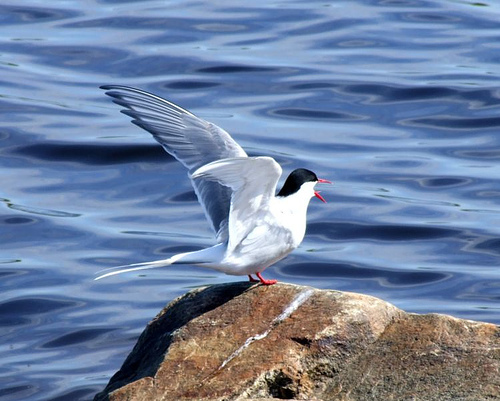

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/133.White_throated_Sparrow/White_Throated_Sparrow_0108_129184.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
90281        7766             8        True             3  21.2500   
125642       7766            11        True             3   4.2180   
278860       7766            24        True             3   4.2180   
608868       7766            52        True             3   8.7330   
632440       7766            54        True             3   8.7330   
667798       7766            57        True             4   2.3180   
1233526      7766           105        True             3   5.1770   
1386744      7766           118        True             4   3.0510   
1410316      7766           120        True             4   3.0510   
1481032      7766           126        True             4   5.3510   
1563534      7766           133        True             4   5.3510   
1587106      7766           135        True             4   5.3510   
1716752      7766           146        True             3   2.4020   
1787468      7766           152        True             4   2.6110   
1811040      7766           154        True             4   3.3490   
1964258      7766           167        True             4   3.3490   
2164620      7766           184        True             4   5.9970   
2211764      7766           188        True             4   5.9970   
2294266      7766           195        True             4   5.9970   
2317838      7766           197        True             4   5.9970   
2471056      7766           210        True             4   2.5910   
2577130      7766           219        True             4   2.4370   
2777492      7766           236        True             4   4.8710   
2883566      7766           245        True             4   5.2100   
3072142      7766           261        True             3   5.4240   
3272504      7766           278        True             3   3.7090   
3343220      7766           284        True             3   5.9510   
3449294      7766           293        True             3   5.9510   
3472866      7766           295        True             3   5.2320   
3626084      7766           308        True             3   5.2320   
3661442      7766           311        True             4   3.0820   

                             attribute_name    attribute_category  \
90281                  has_bill_shape::cone        has_bill_shape   
125642                has_wing_color::brown        has_wing_color   
278860                 has_wing_color::buff        has_wing_color   
608868          has_underparts_color::white  has_underparts_color   
632440           has_underparts_color::buff  has_underparts_color   
667798          has_breast_pattern::striped    has_breast_pattern   
1233526            has_head_pattern::capped      has_head_pattern   
1386744             has_breast_color::white      has_breast_color   
1410316              has_breast_color::buff      has_breast_color   
1481032              has_throat_color::grey      has_throat_color   
1563534             has_throat_color::white      has_throat_color   
1587106              has_throat_color::buff      has_throat_color   
1716752                has_eye_color::black         has_eye_color   
1787468  has_bill_length::shorter_than_head       has_bill_length   
1811040           has_forehead_color::brown    has_forehead_color   
1964258            has_forehead_color::buff    has_forehead_color   
2164620               has_nape_color::brown        has_nape_color   
2211764                has_nape_color::grey        has_nape_color   
2294266               has_nape_color::white        has_nape_color   
2317838                has_nape_color::buff        has_nape_color   
2471056              has_belly_color::white       has_belly_color   
2577130          has_size::small_(5_-_9_in)              has_size   
2777492            has_shape::perching-like             has_shape   
2883566            has_belly_pattern::solid     has_belly_pattern   
3072142            has_primary_color::white

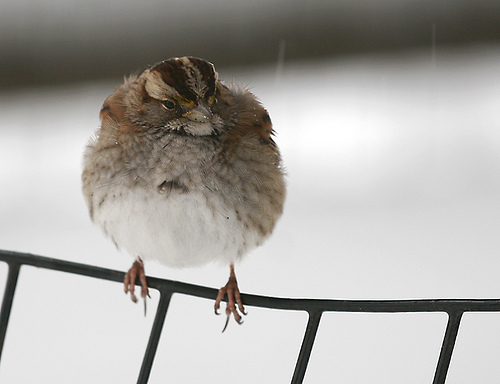

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0031_75531.jpg True


image_id  attribute_id  is_present  certainty_id      time  \
16757        4970             2        True             3  164.2060   
169990       4970            15        True             3    2.8390   
252492       4970            22        True             3    2.8390   
346780       4970            30        True             3    3.9140   
429282       4970            37        True             3    3.9140   
523570       4970            45        True             3    4.1620   
606072       4970            52        True             3    4.1620   
641430       4970            55        True             3    2.2770   
747504       4970            64        True             3    3.4620   
830006       4970            71        True             3    3.4620   
924294       4970            79        True             3    4.8540   
995010       4970            85        True             3    3.0770   
1077512      4970            92        True             3    3.0770   
1148228      4970            98        True             3    2.7020   
1301446      4970           111        True             3    2.8870   
1478236      4970           126        True             3    2.5680   
1643240      4970           140        True             3    2.2550   
1761100      4970           150        True             3    2.2270   
1855388      4970           158        True             3    2.6770   
2032178      4970           173        True             3    4.3160   
2114680      4970           180        True             3    4.3160   
2208968      4970           188        True             3    2.6000   
2385758      4970           203        True             3    2.9680   
2468260      4970           210        True             3    2.9680   
2503618      4970           213        True             3    3.4510   
2597906      4970           221        True             3    2.2040   
2656836      4970           226        True             3    7.3100   
2810054      4970           239        True             3    3.3530   
2857198      4970           243        True             3    2.4220   
2904342      4970           247        True             3    4.6300   
2986844      4970           254        True             3    3.3540   
3069346      4970           261        True             3    3.3540   
3340424      4970           284        True             3    2.9760   
3517214      4970           299        True             3    3.4650   
3658646      4970           311        True             3    1.9740   

                                  attribute_name    attribute_category  \
16757                     has_bill_shape::dagger        has_bill_shape   
169990                      has_wing_color::grey        has_wing_color   
252492                     has_wing_color::white        has_wing_color   
346780                has_upperparts_color::grey  has_upperparts_color   
429282               has_upperparts_color::white  has_upperparts_color   
523570                has_underparts_color::grey  has_underparts_color   
606072               has_underparts_color::white  has_underparts_color   
641430                 has_breast_pattern::solid    has_breast_pattern   
747504                      has_back_color::grey        has_back_color   
830006                     has_back_color::white        has_back_color   
924294              has_tail_shape::squared_tail        has_tail_shape   
995010                has_upper_tail_color::grey  has_upper_tail_color   
1077512              has_upper_tail_color::white  has_upper_tail_color   
1148228                 has_head_pattern::masked      has_head_pattern   
1301446                   has_breast_color::grey      has_breast_color   
1478236                   has_throat_color::grey      has_throat_color   
1643240                      has_eye_color::grey         has_eye_color   
1761100  has_bill_length::about_the_same_as_head       has_bill_length   
1855388                 has_forehead_color::gr

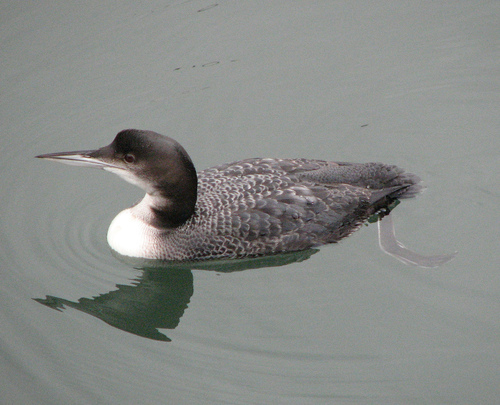

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0019_795013.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
75242        4515             7        True             4  14.5910   
169535       4515            15        True             4   6.2550   
240251       4515            21        True             4   6.2550   
252037       4515            22        True             4   6.2550   
346325       4515            30        True             4   5.1340   
523115       4515            45        True             4   4.5910   
605617       4515            52        True             4   4.5910   
640975       4515            55        True             4   4.8400   
747049       4515            64        True             4   3.9110   
923839       4515            79        True             4   6.4480   
994555       4515            85        True             4   7.0140   
1077057      4515            92        True             4   7.0140   
1183131      4515           101        True             4   3.7910   
1300991      4515           111        True             4   2.9990   
1383493      4515           118        True             4   2.9990   
1477781      4515           126        True             4   5.1020   
1560283      4515           133        True             4   5.1020   
1642785      4515           140        True             4   3.3990   
1713501      4515           146        True             4   3.3990   
1784217      4515           152        True             4   3.9310   
1854933      4515           158        True             4   2.4050   
2031723      4515           173        True             4   3.6300   
2102439      4515           179        True             4   3.6300   
2208513      4515           188        True             4   3.9420   
2385303      4515           203        True             4  10.0320   
2467805      4515           210        True             4  10.0320   
2503163      4515           213        True             4   2.8400   
2609237      4515           222        True             4   2.9790   
2774241      4515           236        True             4   5.0060   
2786027      4515           237        True             4   5.5350   
2856743      4515           243        True             4   8.1040   
2880315      4515           245        True             4   6.8480   
2986389      4515           254        True             4   3.8060   
3339969      4515           284        True             4   8.5820   
3410685      4515           290        True             4   8.5820   
3516759      4515           299        True             4   4.4450   
3587475      4515           305        True             4   4.4450   
3658191      4515           311        True             4   6.7120   

                             attribute_name    attribute_category  \
75242           has_bill_shape::all-purpose        has_bill_shape   
169535                 has_wing_color::grey        has_wing_color   
240251                has_wing_color::black        has_wing_color   
252037                has_wing_color::white        has_wing_color   
346325           has_upperparts_color::grey  has_upperparts_color   
523115           has_underparts_color::grey  has_underparts_color   
605617          has_underparts_color::white  has_underparts_color   
640975            has_breast_pattern::solid    has_breast_pattern   
747049                 has_back_color::grey        has_back_color   
923839         has_tail_shape::squared_tail        has_tail_shape   
994555           has_upper_tail_color::grey  has_upper_tail_color   
1077057         has_upper_tail_color::white  has_upper_tail_color   
1183131           has_head_pattern::eyering      has_head_pattern   
1300991              has_breast_color::grey      has_breast_color   
1383493             has_breast_color::white      has_breast_color   
1477781              has_throat_color::grey      has_throat_color   
1560283             has_throat_color::white      has_throat_color   
1642785                 has_eye_colo

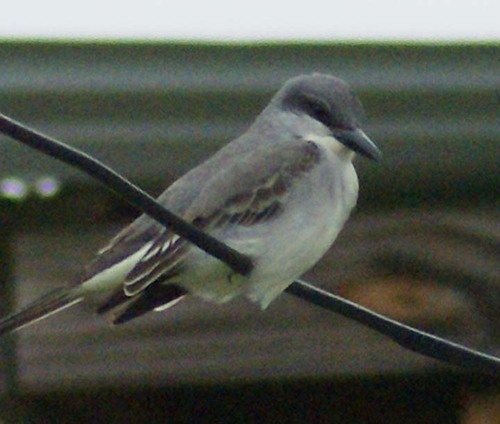

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0099_64435.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
110331       4241            10        True             4   4.7420   
239977       4241            21        True             4   4.7420   
251763       4241            22        True             4   4.7420   
287121       4241            25        True             3   9.0580   
428553       4241            37        True             3   9.0580   
522841       4241            45        True             4   5.9820   
605343       4241            52        True             4   5.9820   
640701       4241            55        True             4   7.3430   
911779       4241            78        True             4   9.0460   
935351       4241            80        True             4   8.5390   
1123927      4241            96        True             3  45.8770   
1300717      4241           111        True             4   1.7850   
1560009      4241           133        True             4   3.2640   
1713227      4241           146        True             4   3.2880   
1760371      4241           150        True             2  10.9210   
1854659      4241           158        True             4  11.9790   
1972519      4241           168        True             4   6.2320   
2102165      4241           179        True             4   6.2320   
2113951      4241           180        True             4   6.2320   
2467531      4241           210        True             4   2.3650   
2538247      4241           216        True             2  14.9380   
2573605      4241           219        True             4   5.9350   
2773967      4241           236        True             3  63.2620   
2844683      4241           242        True             4   9.5330   
2880041      4241           245        True             4   4.4390   
2927185      4241           249        True             4   6.1030   
3068617      4241           261        True             4   6.1030   
3162905      4241           269        True             4   3.6850   
3339695      4241           284        True             4   5.5500   
3422197      4241           291        True             4   5.5500   
3516485      4241           299        True             4   6.5760   
3669703      4241           312        True             3  22.4220   

                                  attribute_name    attribute_category  \
110331                      has_wing_color::blue        has_wing_color   
239977                     has_wing_color::black        has_wing_color   
251763                     has_wing_color::white        has_wing_color   
287121                has_upperparts_color::blue  has_upperparts_color   
428553               has_upperparts_color::white  has_upperparts_color   
522841                has_underparts_color::grey  has_underparts_color   
605343               has_underparts_color::white  has_underparts_color   
640701                 has_breast_pattern::solid    has_breast_pattern   
911779              has_tail_shape::pointed_tail        has_tail_shape   
935351                has_upper_tail_color::blue  has_upper_tail_color   
1123927                  has_head_pattern::malar      has_head_pattern   
1300717                   has_breast_color::grey      has_breast_color   
1560009                  has_throat_color::white      has_throat_color   
1713227                     has_eye_color::black         has_eye_color   
1760371  has_bill_length::about_the_same_as_head       has_bill_length   
1854659                 has_forehead_color::grey    has_forehead_color   
1972519               has_under_tail_color::blue  has_under_tail_color   
2102165              has_under_tail_color::black  has_under_tail_color   
2113951              has_under_tail_color::white  has_under_tail_color   
2467531                   has_belly_color::white       has_belly_color   
2538247            has_wing_shape::tapered-wings        has_wing_shape   
2573605               has_size::small_(5_-_9_in)              has_size

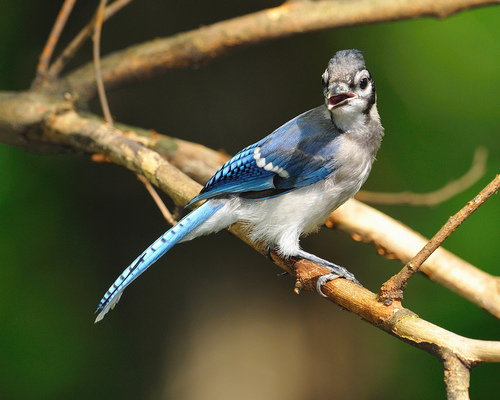

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0030_1122.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
11919         132             2        True             3  64.6760   
165153        132            15        True             4   3.0200   
341943        132            30        True             4   5.4160   
636593        132            55        True             3  16.8710   
742667        132            64        True             4   4.2720   
907671        132            78        True             4  11.3990   
990173        132            85        True             4   5.1520   
1178749       132           101        True             3  26.9080   
1296609       132           111        True             3   4.7780   
1544115       132           132        True             4   4.7200   
1720905       132           147        True             3  16.3890   
1756263       132           150        True             3  14.8980   
1921267       132           164        True             4   6.0480   
2027341       132           173        True             4   6.5830   
2204131       132           188        True             4   4.1440   
2451637       132           209        True             3  11.2720   
2534139       132           216        True             4  11.3360   
2593069       132           221        True             3  25.0940   
2758073       132           235        True             4  15.7420   
2781645       132           237        True             4   9.6400   
2828789       132           241        True             3   8.9120   
2982007       132           254        True             4   4.8230   
3406303       132           290        True             3  11.3400   
3583093       132           305        True             4   4.6710   
3630237       132           309        True             4   5.7480   

                                  attribute_name    attribute_category  \
11919                     has_bill_shape::dagger        has_bill_shape   
165153                      has_wing_color::grey        has_wing_color   
341943                has_upperparts_color::grey  has_upperparts_color   
636593                 has_breast_pattern::solid    has_breast_pattern   
742667                      has_back_color::grey        has_back_color   
907671              has_tail_shape::pointed_tail        has_tail_shape   
990173                has_upper_tail_color::grey  has_upper_tail_color   
1178749                has_head_pattern::eyering      has_head_pattern   
1296609                   has_breast_color::grey      has_breast_color   
1544115                  has_throat_color::black      has_throat_color   
1720905                     has_eye_color::white         has_eye_color   
1756263  has_bill_length::about_the_same_as_head       has_bill_length   
1921267                has_forehead_color::black    has_forehead_color   
2027341               has_under_tail_color::grey  has_under_tail_color   
2204131                     has_nape_color::grey        has_nape_color   
2451637                   has_belly_color::black       has_belly_color   
2534139            has_wing_shape::tapered-wings        has_wing_shape   
2593069             has_size::medium_(9_-_16_in)              has_size   
2758073                  has_shape::swallow-like             has_shape   
2781645                  has_back_pattern::solid      has_back_pattern   
2828789                  has_tail_pattern::solid      has_tail_pattern   
2982007                  has_primary_color::grey     has_primary_color   
3406303                    has_bill_color::black        has_bill_color   
3583093                   has_crown_color::black       has_crown_color   
3630237                  has_wing_pattern::solid      has_wing_pattern   

         attribute_sub_category  
11919                    dagger  
165153                     grey  
341943                     grey  
636593                    solid  
742667                     grey  
907671             pointed_tail  
990173                   

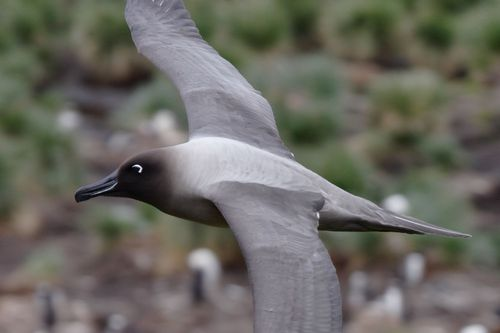

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/160.Black_throated_Blue_Warbler/Black_Throated_Blue_Warbler_0130_161682.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
80120        9393             7        True             4  24.2010   
245128       9393            21        True             4   6.8260   
256914       9393            22        True             4   6.8260   
280486       9393            24        True             4   6.8260   
351202       9393            30        True             4  14.2400   
421918       9393            36        True             4  14.2400   
433704       9393            37        True             4  14.2400   
457276       9393            39        True             4  14.2400   
598708       9393            51        True             4  13.2490   
610494       9393            52        True             4  13.2490   
751926       9393            64        True             4   3.9990   
822642       9393            70        True             4   3.9990   
858000       9393            73        True             4   3.9990   
916930       9393            78        True             4  20.2540   
1081934      9393            92        True             4   8.1990   
1105506      9393            94        True             4   8.1990   
1188008      9393           101        True             4  41.0230   
1553374      9393           132        True             4   4.4580   
1741950      9393           148        True             4   5.8100   
1789094      9393           152        True             4  13.7870   
1859810      9393           158        True             4   4.7670   
1930526      9393           164        True             4   4.7670   
2119102      9393           180        True             4   4.1510   
2142674      9393           182        True             4   4.1510   
2213390      9393           188        True             4   4.9450   
2284106      9393           194        True             4   4.9450   
2460896      9393           209        True             4   2.7020   
2472682      9393           210        True             4   2.7020   
2578756      9393           219        True             4   4.7820   
2720188      9393           231        True             4   4.1980   
2826262      9393           240        True             4   6.2210   
2873406      9393           244        True             4   5.3080   
2920550      9393           248        True             4   8.9800   
2991266      9393           254        True             4   9.1360   
3061982      9393           260        True             4   9.1360   
3073768      9393           261        True             4   9.1360   
3097340      9393           263        True             4   9.1360   
3168056      9393           269        True             4   3.5250   
3238772      9393           275        True             4   3.5250   
3344846      9393           284        True             4   6.2880   
3415562      9393           290        True             4   6.2880   
3521636      9393           299        True             4   6.0310   
3592352      9393           305        True             4   6.0310   
3674854      9393           312        True             4   4.8670   

                             attribute_name    attribute_category  \
80120           has_bill_shape::all-purpose        has_bill_shape   
245128                has_wing_color::black        has_wing_color   
256914                has_wing_color::white        has_wing_color   
280486                 has_wing_color::buff        has_wing_color   
351202           has_upperparts_color::grey  has_upperparts_color   
421918          has_upperparts_color::black  has_upperparts_color   
433704          has_upperparts_color::white  has_upperparts_color   
457276           has_upperparts_color::buff  has_upperparts_color   
598708          has_underparts_color::black  has_underparts_color   
610494          has_underparts_color::white  has_underparts_color   
751926                 has_back_color::grey        has_back_color   
822642                has_back

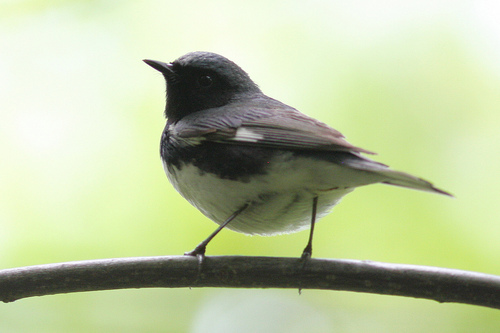

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/074.Florida_Jay/Florida_Jay_0002_64476.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
75033        4306             7        True             3  28.5120   
110396       4306            10        True             4   4.2110   
169326       4306            15        True             4   4.2110   
287186       4306            25        True             4   5.1670   
346116       4306            30        True             4   5.1670   
463976       4306            40        True             4   6.4240   
522906       4306            45        True             4   6.4240   
676124       4306            58        True             4   3.1800   
687910       4306            59        True             4   5.3390   
746840       4306            64        True             4   5.3390   
888272       4306            76        True             2  29.2630   
935416       4306            80        True             4   2.9260   
1171136      4306           100        True             4   7.1600   
1241852      4306           106        True             4   2.9020   
1300782      4306           111        True             4   2.9020   
1418642      4306           121        True             3   4.7890   
1477572      4306           126        True             3   4.7890   
1713292      4306           146        True             4   2.6990   
1760436      4306           150        True             3   8.5310   
1795794      4306           153        True             3   7.4950   
1854724      4306           158        True             3   7.4950   
1972584      4306           168        True             4   3.7230   
2149374      4306           183        True             4   3.3940   
2326164      4306           198        True             3   7.7220   
2385094      4306           203        True             3   7.7220   
2502954      4306           213        True             2  13.5960   
2573670      4306           219        True             3   2.8420   
2774032      4306           236        True             4   7.4320   
2821176      4306           240        True             3   5.0280   
2832962      4306           241        True             3   6.2090   
2915464      4306           248        True             3   2.9110   
2927250      4306           249        True             4   3.5340   
2986180      4306           254        True             4   3.5340   
3233686      4306           275        True             4   3.5470   
3410476      4306           290        True             4   3.4260   
3457620      4306           294        True             4   4.5340   
3669768      4306           312        True             3   6.4400   

                                  attribute_name    attribute_category  \
75033                has_bill_shape::all-purpose        has_bill_shape   
110396                      has_wing_color::blue        has_wing_color   
169326                      has_wing_color::grey        has_wing_color   
287186                has_upperparts_color::blue  has_upperparts_color   
346116                has_upperparts_color::grey  has_upperparts_color   
463976                has_underparts_color::blue  has_underparts_color   
522906                has_underparts_color::grey  has_underparts_color   
676124         has_breast_pattern::multi-colored    has_breast_pattern   
687910                      has_back_color::blue        has_back_color   
746840                      has_back_color::grey        has_back_color   
888272              has_tail_shape::notched_tail        has_tail_shape   
935416                has_upper_tail_color::blue  has_upper_tail_color   
1171136                has_head_pattern::eyebrow      has_head_pattern   
1241852                   has_breast_color::blue      has_breast_color   
1300782                   has_breast_color::grey      has_breast_color   
1418642                   has_throat_color::blue      has_throat_color   
1477572                   has_throat_color::grey      has_throat_color   
1713292         

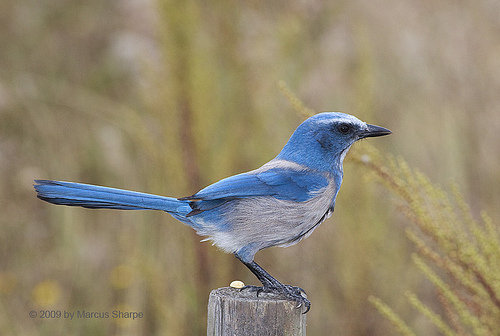

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0085_794682.jpg True


image_id  attribute_id  is_present  certainty_id     time  \
85255        2740             8        True             4   4.4850   
167760       2740            15        True             4   7.8910   
179546       2740            16        True             4   7.8910   
238476       2740            21        True             4   7.8910   
250262       2740            22        True             4   7.8910   
344550       2740            30        True             4  10.4840   
356336       2740            31        True             4  10.4840   
415266       2740            36        True             4  10.4840   
450624       2740            39        True             4  10.4840   
521340       2740            45        True             3   5.3750   
627414       2740            54        True             3   5.3750   
639200       2740            55        True             4  13.7660   
733488       2740            63        True             4   4.1090   
851348       2740            73        True             4   4.1090   
886706       2740            76        True             4   2.7340   
1228500      2740           105        True             3  14.7970   
1299216      2740           111        True             4   2.4530   
1405290      2740           120        True             4   2.4530   
1711726      2740           146        True             4   3.9540   
1782442      2740           152        True             4   2.3430   
2029948      2740           173        True             4   2.9530   
2100664      2740           179        True             4   2.9530   
2206738      2740           188        True             4   4.3910   
2277454      2740           194        True             4   4.3910   
2383528      2740           203        True             4   3.2810   
2489602      2740           212        True             4   3.2810   
2513174      2740           214        True             3   3.3280   
2572104      2740           219        True             4   1.8590   
2772466      2740           236        True             4   3.3750   
2784252      2740           237        True             4   2.7960   
2866754      2740           244        True             4   5.9680   
2878540      2740           245        True             4   2.7810   
2984614      2740           254        True             4   7.8130   
2996400      2740           255        True             4   7.8130   
3055330      2740           260        True             4   7.8130   
3090688      2740           263        True             4   7.8130   
3161404      2740           269        True             4  22.1880   
3267478      2740           278        True             4  22.1880   
3338194      2740           284        True             4   2.7500   
3467840      2740           295        True             4   9.1250   
3514984      2740           299        True             4   9.1250   
3585700      2740           305        True             4   9.1250   
3668202      2740           312        True             4   4.0310   

                             attribute_name    attribute_category  \
85255                  has_bill_shape::cone        has_bill_shape   
167760                 has_wing_color::grey        has_wing_color   
179546               has_wing_color::yellow        has_wing_color   
238476                has_wing_color::black        has_wing_color   
250262                has_wing_color::white        has_wing_color   
344550           has_upperparts_color::grey  has_upperparts_color   
356336         has_upperparts_color::yellow  has_upperparts_color   
415266          has_upperparts_color::black  has_upperparts_color   
450624           has_upperparts_color::buff  has_upperparts_color   
521340           has_underparts_color::grey  has_underparts_color   
627414           has_underparts_color::buff  has_underparts_color   
639200            has_breast_pattern::solid    has_breast_pattern   
733488               has_back_c

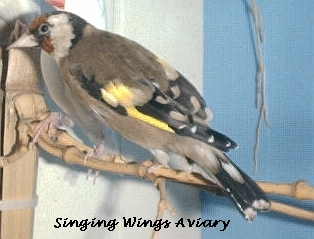

/home/dcor/roeyron/datasets/CUB_200_2011/CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0092_162044.jpg True


image_id  attribute_id  is_present  certainty_id      time  \
91984        9469             8        True             4   18.9780   
539854       9469            46        True             4   13.0300   
645928       9469            55        True             4    5.3520   
716644       9469            61        True             4   10.9680   
1317730      9469           112        True             4   10.5910   
1494520      9469           127        True             4    4.0140   
1718454      9469           146        True             4    4.5290   
1871672      9469           159        True             4    3.4870   
2402042      9469           204        True             4   48.5850   
2578832      9469           219        True             4    8.7760   
2779194      9469           236        True             4   45.3480   
2885268      9469           245        True             4  124.6690   
3003128      9469           255        True             4    5.3570   
3533498      9469           300        True             4    6.8980   

                       attribute_name    attribute_category  \
91984            has_bill_shape::cone        has_bill_shape   
539854   has_underparts_color::yellow  has_underparts_color   
645928      has_breast_pattern::solid    has_breast_pattern   
716644     has_back_color::iridescent        has_back_color   
1317730      has_breast_color::yellow      has_breast_color   
1494520      has_throat_color::yellow      has_throat_color   
1718454          has_eye_color::black         has_eye_color   
1871672    has_forehead_color::yellow    has_forehead_color   
2402042       has_belly_color::yellow       has_belly_color   
2578832    has_size::small_(5_-_9_in)              has_size   
2779194      has_shape::perching-like             has_shape   
2885268      has_belly_pattern::solid     has_belly_pattern   
3003128     has_primary_color::yellow     has_primary_color   
3533498       has_crown_color::yellow       has_crown_color   

        attribute_sub_category  
91984                     cone  
539854                  yellow  
645928                   solid  
716644              iridescent  
1317730                 yellow  
1494520                 yellow  
1718454                  black  
1871672                 yellow  
2402042                 yellow  
2578832       small_(5_-_9_in)  
2779194          perching-like  
2885268                  solid  
3003128                 yellow  
3533498                 yellow

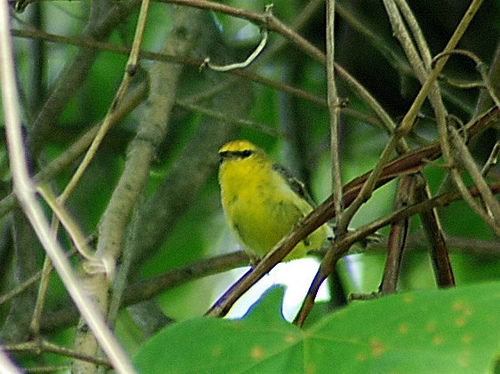

In [267]:
df_images = dfs['images']
for _, row in df_images.sample(10, random_state=10).iterrows():
    image_path = os.path.join(data_path, 'CUB_200_2011/images', row.image_name)
    print(image_path, os.path.exists(image_path))
    image = Image.open(image_path)

    cur_image_attrs = df_image_attribute_labels[df_image_attribute_labels.image_id == row.image_id]
    cur_image_attrs = cur_image_attrs[cur_image_attrs.is_present]
    display(cur_image_attrs)

    display(image)

# Create triplets

In [386]:
from PIL import Image, ImageDraw, ImageFont

def add_text_to_image(image, text, font_size=30, above_image=False):
    draw = ImageDraw.Draw(image)
    # Load a font
    font = ImageFont.truetype("arial.ttf", font_size)
    # Calculate text size
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    if above_image:
        # Create a new image with extra space on top for text
        new_image_height = image.height + text_height + 20  # Additional 20 pixels for padding
        new_image = Image.new('RGB', (image.width, new_image_height), 'white')
        new_image.paste(image, (0, text_height + 20))

        # Create a drawing context
        draw = ImageDraw.Draw(new_image)
        text_x = 10  # Margin from the left edge
        text_y = 10  # Margin from the top edge (on the new image)
    else:
        # Set dimensions to draw text over the image
        new_image = image
        draw = ImageDraw.Draw(new_image)
        text_x = 10  # Margin from the left edge
        text_y = 10  # Margin from the top edge

    # Draw white background rectangle for the text
    draw.rectangle([text_x, text_y, text_x + text_width, text_y + text_height * 1.4], fill=(255, 255, 255, 10))

    # Draw the text on the new image
    draw.text((text_x, text_y), text, fill='black', font=font)

    return new_image


In [393]:
list(df_atttributes['attribute_category'].unique())

['has_bill_shape',
 'has_wing_color',
 'has_upperparts_color',
 'has_underparts_color',
 'has_breast_pattern',
 'has_back_color',
 'has_tail_shape',
 'has_upper_tail_color',
 'has_head_pattern',
 'has_breast_color',
 'has_throat_color',
 'has_eye_color',
 'has_bill_length',
 'has_forehead_color',
 'has_under_tail_color',
 'has_nape_color',
 'has_belly_color',
 'has_wing_shape',
 'has_size',
 'has_shape',
 'has_back_pattern',
 'has_tail_pattern',
 'has_belly_pattern',
 'has_primary_color',
 'has_leg_color',
 'has_bill_color',
 'has_crown_color',
 'has_wing_pattern']

query ['fan-shaped_tail'] ['rounded-wings']
positive ['fan-shaped_tail'] ['pointed-wings']
negative ['pointed_tail'] ['rounded-wings', 'tapered-wings']
Triplet(q_id=5357, p_id=3759, n_id=5355, p_cat='has_tail_shape', n_cat='has_wing_shape', p_sub_cat='fan-shaped_tail', n_sub_cat='rounded-wings')


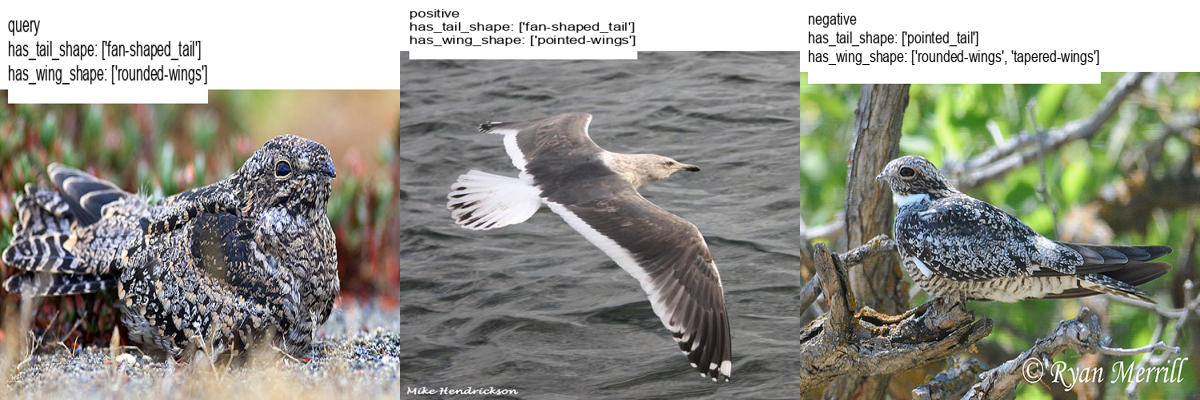

In [409]:
from dataclasses import dataclass


@dataclass
class Triplet:
    q_id: int
    p_id: int
    n_id: int

    p_cat: str
    n_cat: str

    p_sub_cat: str
    n_sub_cat: str

use_all_cats = False
if use_all_cats:
    cats_to_use = list(df_atttributes['attribute_category'].unique())
else:
    cats_to_use = [
        'has_bill_shape',
        'has_tail_shape',
        'has_wing_shape',
        'has_bill_length'
        'has_shape',
        'has_primary_color'
    ]

def sample_triplet() -> Triplet:
    p_cat, n_cat = np.random.choice(cats_to_use, 2, replace=False)
    df = df_image_attribute_labels.copy()
    df = df[df.is_present]
    df = df[(df.certainty_id == 3) | (df.certainty_id == 4)]

    p_sub_cat = df[df.attribute_category == p_cat].sample(1).attribute_sub_category.iloc[0]  # sub cat we want p to have and n to not have
    n_sub_cat = df[df.attribute_category == n_cat].sample(1).attribute_sub_category.iloc[0]  # sub cat we want p to not have and n to have

    set_1 = set([row.image_id for _, row in df[(df.attribute_category == p_cat) & (df.attribute_sub_category == p_sub_cat)].iterrows()])  # all images having the p sub cat
    set_2 = set([row.image_id for _, row in df[(df.attribute_category == n_cat) & (df.attribute_sub_category == n_sub_cat)].iterrows()])  # all images having the n sub cat

    q_id = np.random.choice(list(set_1 & set_2))  # all images haveing both p sub cat and n sub cat
    p_id = np.random.choice(list(set_1 - set_2))  # all images havein p sub cat but not n sub cat
    n_id = np.random.choice(list(set_2 - set_1))  # all images having n sub cat but not p sub cat

    triplet = Triplet(q_id, p_id, n_id, 
                    p_cat, n_cat,
                    p_sub_cat, n_sub_cat)
    return triplet

def plot_triplet(triplet: Triplet):
    image_names = [df_images[df_images.image_id == i]['image_name'].iloc[0] for i in [triplet.q_id, triplet.p_id, triplet.n_id]]
    iamge_paths = [os.path.join(data_path, 'CUB_200_2011/images', image_name) for image_name in image_names]
    images = [Image.open(p) for p in iamge_paths]

    texts = []
    for name, image_id in zip(['query', 'positive', 'negative'], [triplet.q_id, triplet.p_id, triplet.n_id]):

        p_sub_cats = df[(df['image_id'] == image_id) & (df['attribute_category'] == triplet.p_cat)]['attribute_sub_category'].to_list()
        n_sub_cats = df[(df['image_id'] == image_id) & (df['attribute_category'] == triplet.n_cat)]['attribute_sub_category'].to_list()
        line1 = name
        line2 = f'{triplet.p_cat}: {p_sub_cats}'
        line3 = f'{triplet.n_cat}: {n_sub_cats}'
        text = "\n".join([line1, line2, line3])

        print(name, p_sub_cats, n_sub_cats)
        
        texts.append(text)

    images = [add_text_to_image(image, text, 16, above_image=True) for image, text in zip(images, texts)]
    print(triplet)
    display(Image.fromarray(np.concatenate([img.resize((400, 400)) for img in images], axis=1)))

triplet = sample_triplet()
plot_triplet(triplet)

In [ ]:
VALID_TRIPLETS = [
    Triplet(q_id=9504, p_id=5009, n_id=8748, p_cat='has_bill_color', n_cat='has_tail_shape', p_sub_cat='grey', n_sub_cat='squared_tail'),
    
]